# Hotel Reservations 

#### 온라인 호텔 예약 채널에서 예약과 고객의 선택은 계속 변화한다. 취소나 노쇼에 의해 상당수의 호텔 예약이 취소된다.
#### 호텔의 입장에서 손해. 호텔이 처리해야 하는 마이너스 요인. 

#### 데이터셋
##### 19개의 컬럼과 36275개의 데이터

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
from sklearn import svm, preprocessing
from matplotlib import style

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [5]:
df.isnull().sum() # 결측값 x

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## EDA

#### Number of visitors

array([<AxesSubplot:ylabel='count'>], dtype=object)

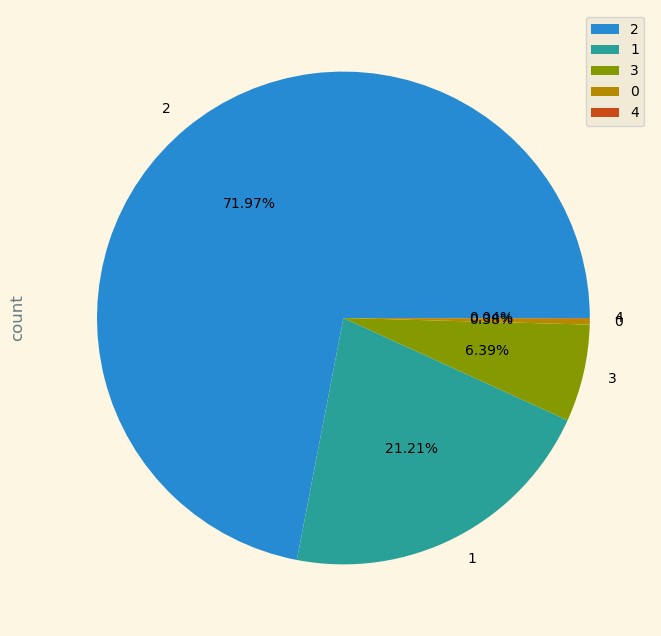

In [15]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie',
                                                                                                      autopct='%1.2f%%',
                                                                                                     subplots=True,
                                                                                                     figsize=(8,8))

array([<AxesSubplot:ylabel='count'>], dtype=object)

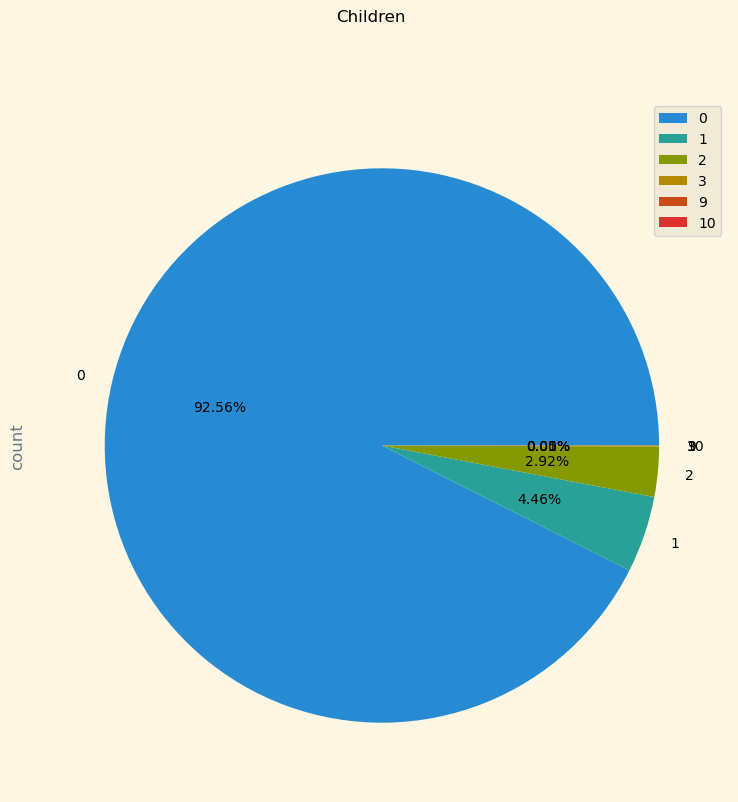

In [17]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',
                                                                      ascending=False).plot(kind='pie',
                                                                                            autopct='%1.2f%%',
                                                                                            subplots=True,
                                                                                            title='Children',
                                                                                            figsize=(9,9))


### Nights

<AxesSubplot:xlabel='no_of_weekend_nights'>

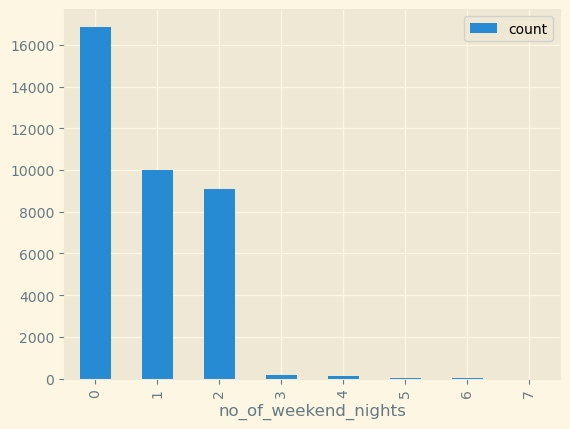

In [21]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                                             )

<AxesSubplot:xlabel='no_of_week_nights', ylabel='Count'>

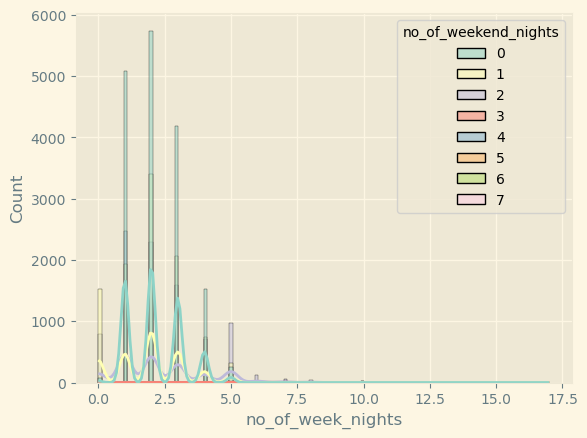

In [22]:
sns.histplot(x='no_of_week_nights',
             data=df, 
             hue='no_of_weekend_nights',
             kde=True, 
             palette='Set3')

## Meal plans

array([<AxesSubplot:ylabel='count'>], dtype=object)

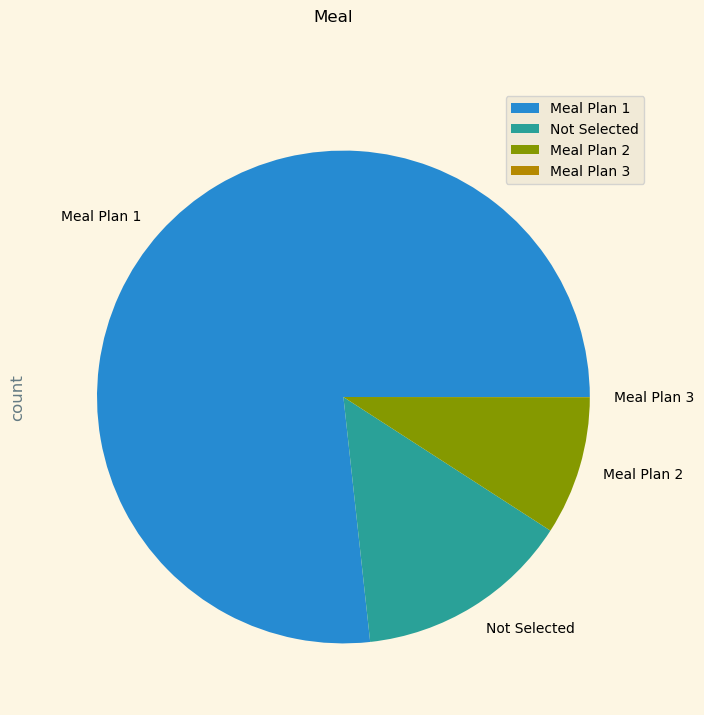

In [29]:
df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie',
                                                                                                          subplots=True,
                                                                                                          figsize=(8,8),
                                                                                                          title='Meal')

# Parking Place

array([<AxesSubplot:ylabel='count'>], dtype=object)

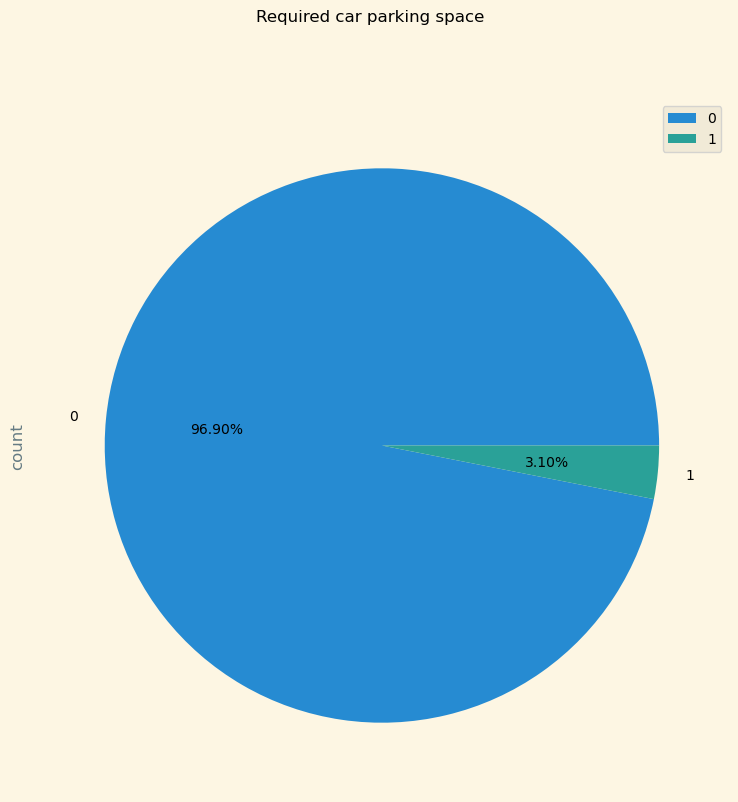

In [31]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Required car parking space',figsize=(9,9))


### Room Type

<AxesSubplot:ylabel='room_type_reserved'>

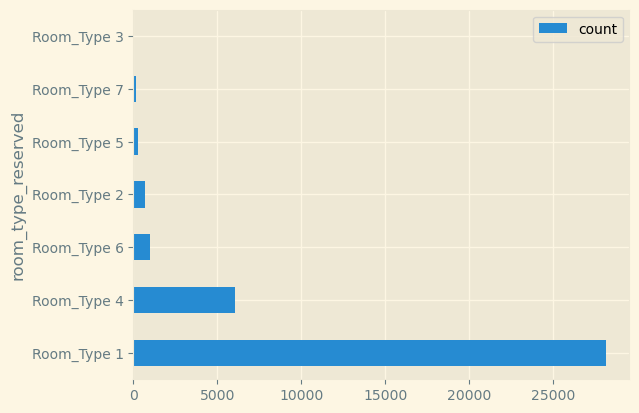

In [46]:
df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by="count", ascending=False).plot(kind='barh')

### 월별 예약 빈도

array([<AxesSubplot:ylabel='count'>], dtype=object)

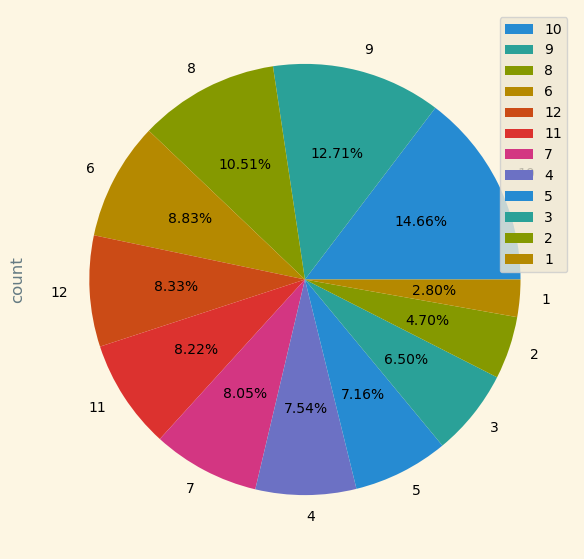

In [53]:
df.groupby('arrival_month')['Booking_ID'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie',subplots=True,
                                                                                                       autopct="%1.2f%%",
                                                                                                      figsize=(7,7))

### 월 -> 계절

In [54]:
def season(x):
    if x in [9,10,11]:
        return 'Autumn'
    if x in [1,2,12]:
        return 'Winter'
    if x in [3,4,5]:
        return 'Spring'
    if x in [6,7,8]:
        return 'Summer'
    
    return x

In [56]:
df['season_group'] = df['arrival_month'].apply(season)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season_group
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,Autumn
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,Autumn
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,Winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,Spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,Summer
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,Autumn
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,Summer
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,Spring


array([<AxesSubplot:ylabel='count'>], dtype=object)

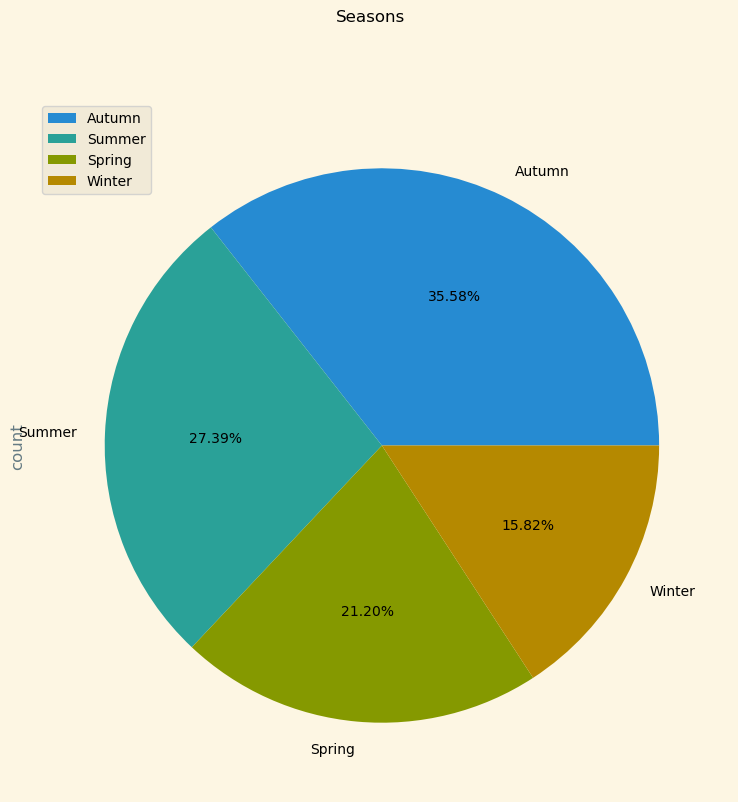

In [57]:
df.groupby('season_group')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Seasons',figsize=(9,9))


#### 분석 

* 대부분의 예약은 2명의 성인을 위한 방으로 예약됌.
* 아이들은 없는 경우가 많고, 일반적으로 방을 예약하는 기간이 짧음. ( 여름 예약이 많음 )
* meal_plan_1을 대부분 선택, 주차장은 잘 사용하지 않음. 대부분의 룸타입이 1아니면 4.

## 상관 관계 분석 
#### corrlation

<AxesSubplot:>

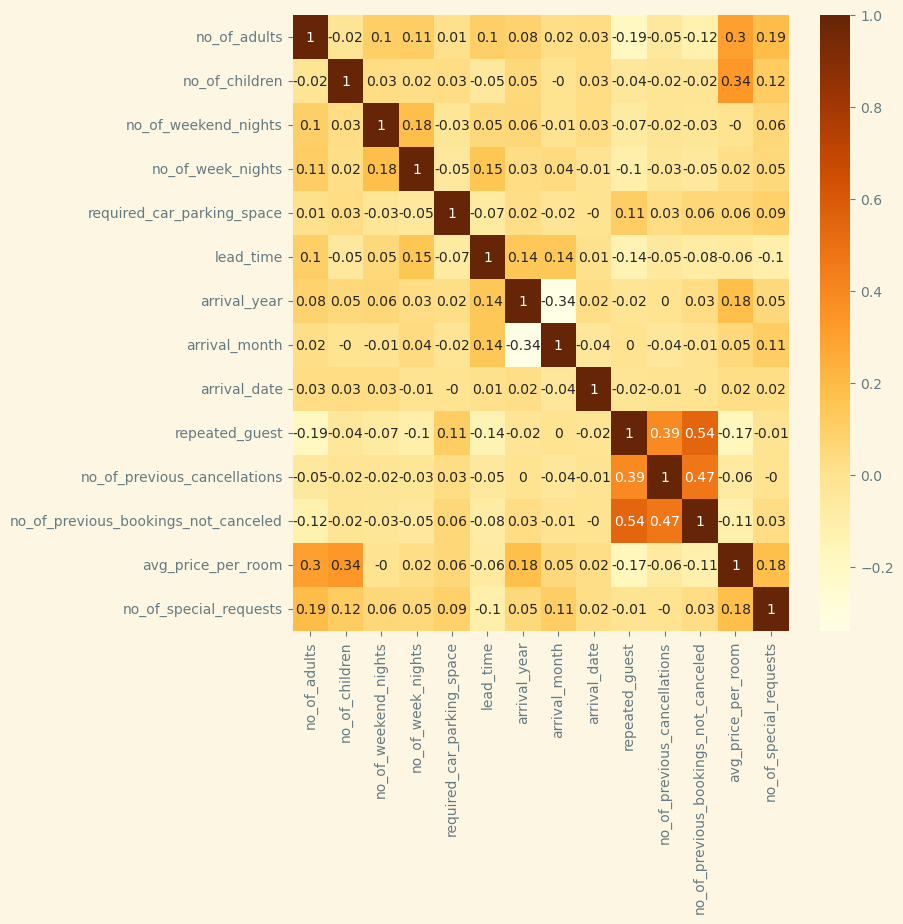

In [40]:
correlation = df.corr().round(2)
plt.figure(figsize=(8,8))

sns.heatmap(correlation, annot=True, cmap = 'YlOrBr')

<AxesSubplot:title={'center':'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

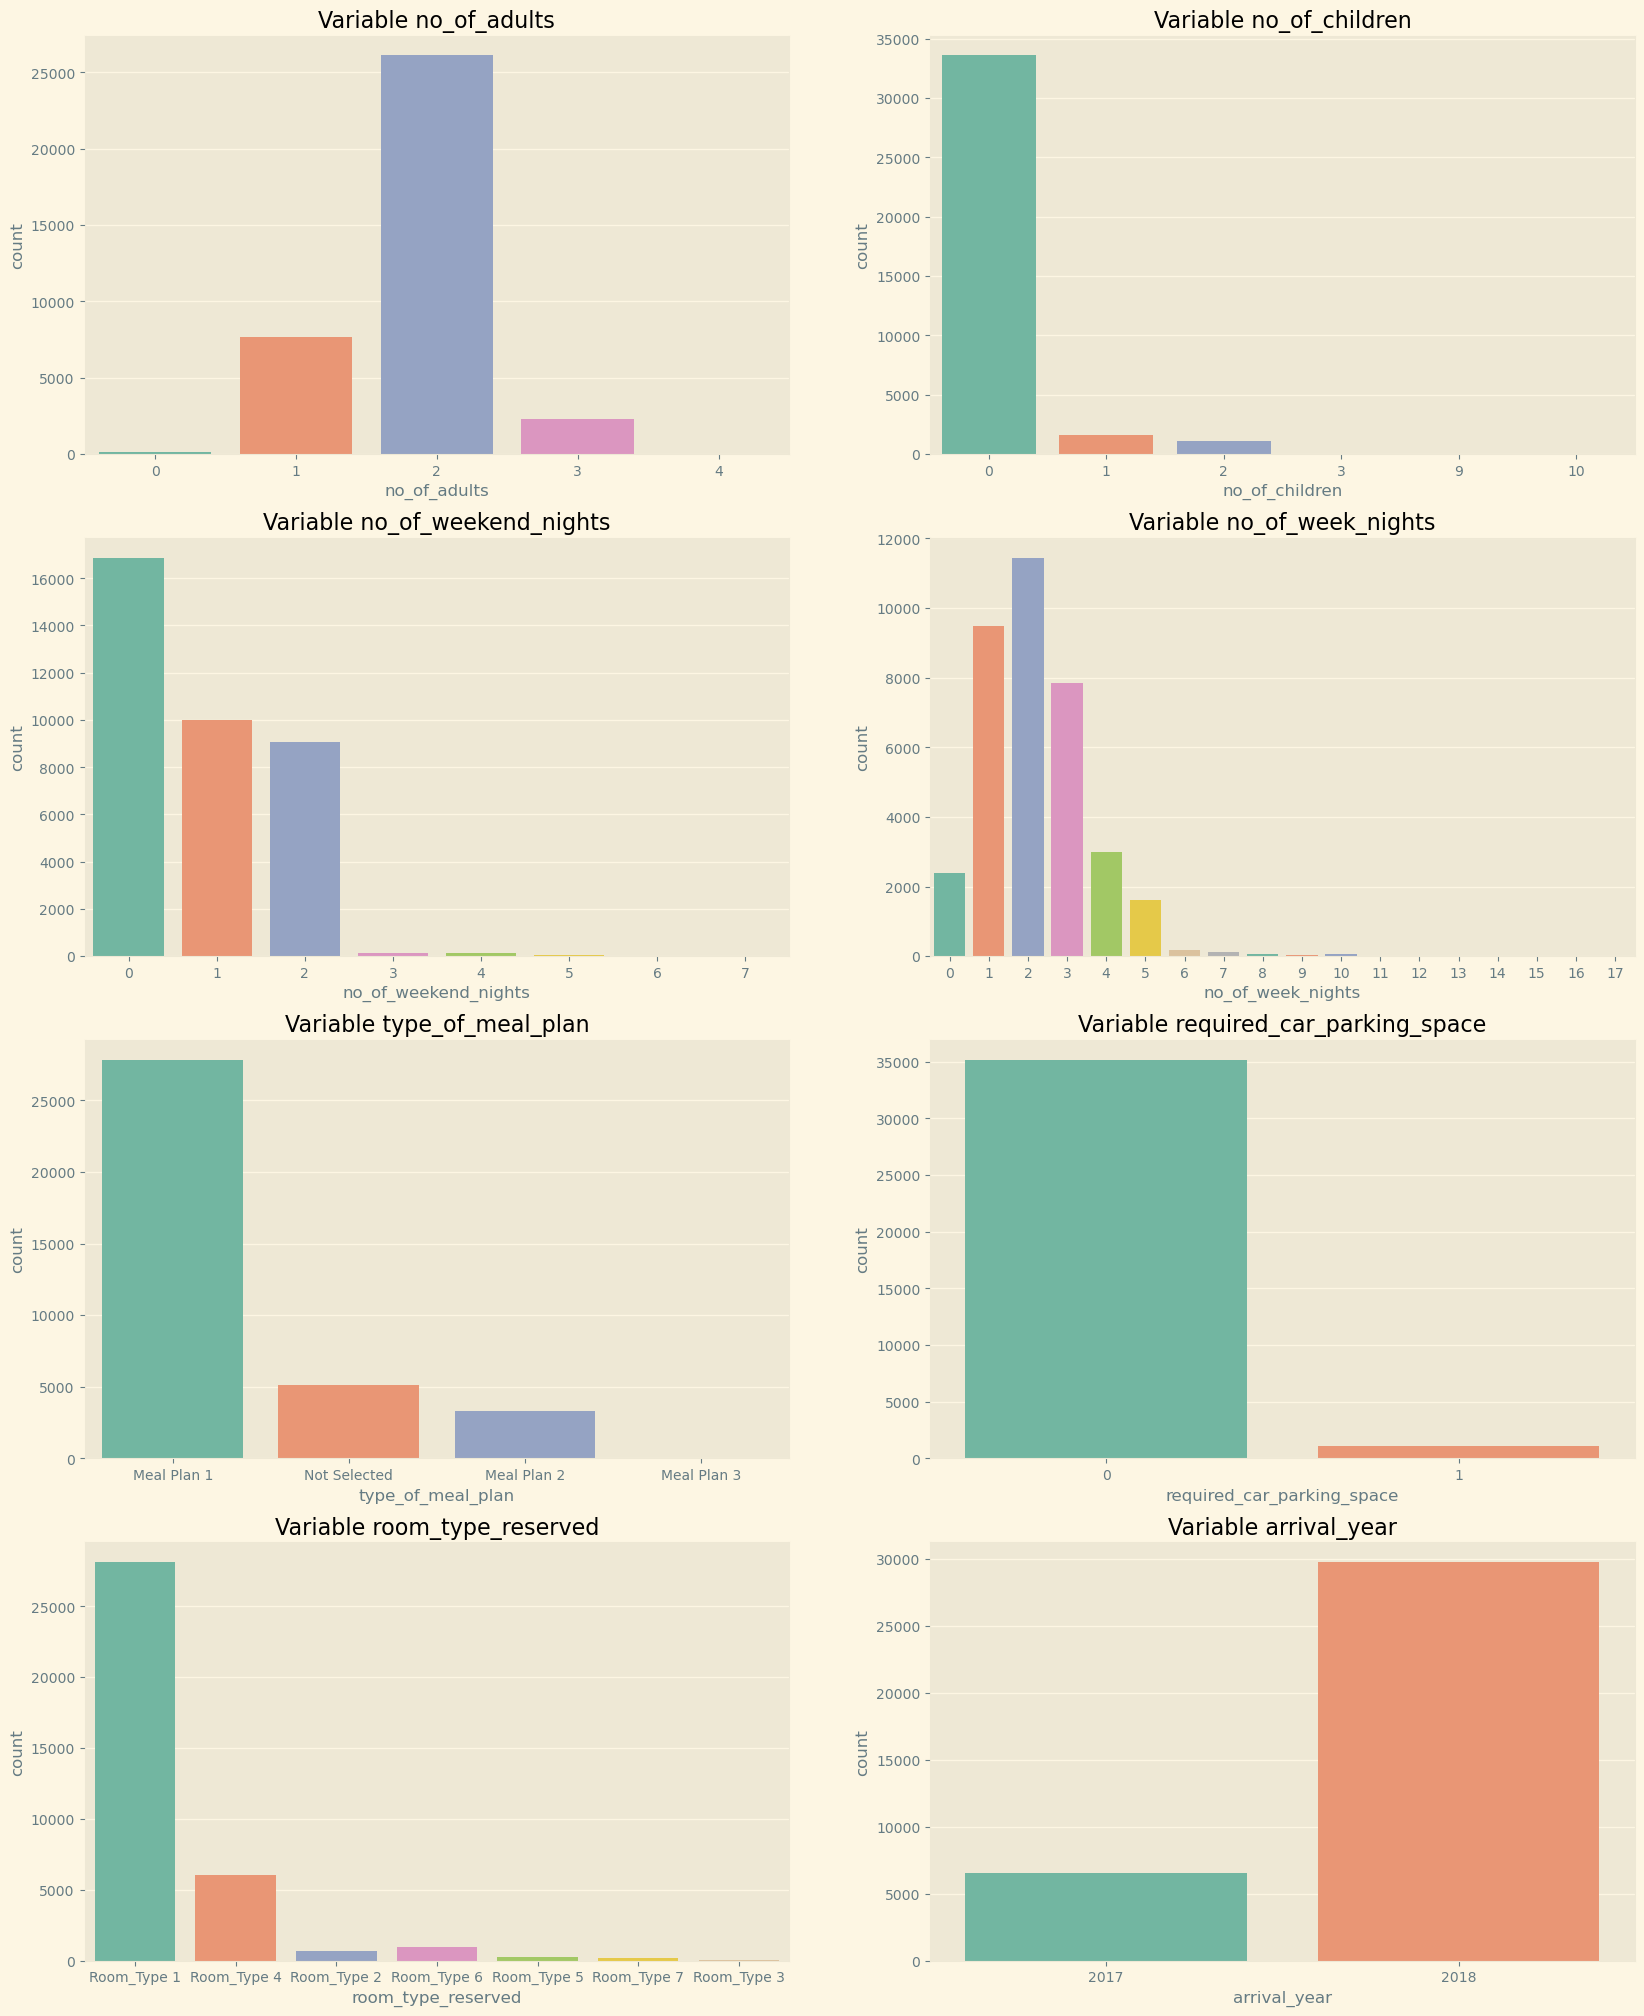

In [58]:

plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## 분석
 
* 1월~10월까지 예약의 횟수가 점진적으로 증가함을 볼 수 있고 11월과 12월에 다시 하락함.
* 대부분의 예약은 온라인에서 이루어졌다
* 손님의 대부분은 호텔에 와본적 없는 사람이거나 예약 취소를 한 적이 없는 사람들.
* 특별 요청의 수가 많아질수록 데이터가 적어짐
* 타깃 변수(취소)를 보면 약 65%의 예약이 취소되지 않은 것을 알 수 있다.

<AxesSubplot:title={'center':'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

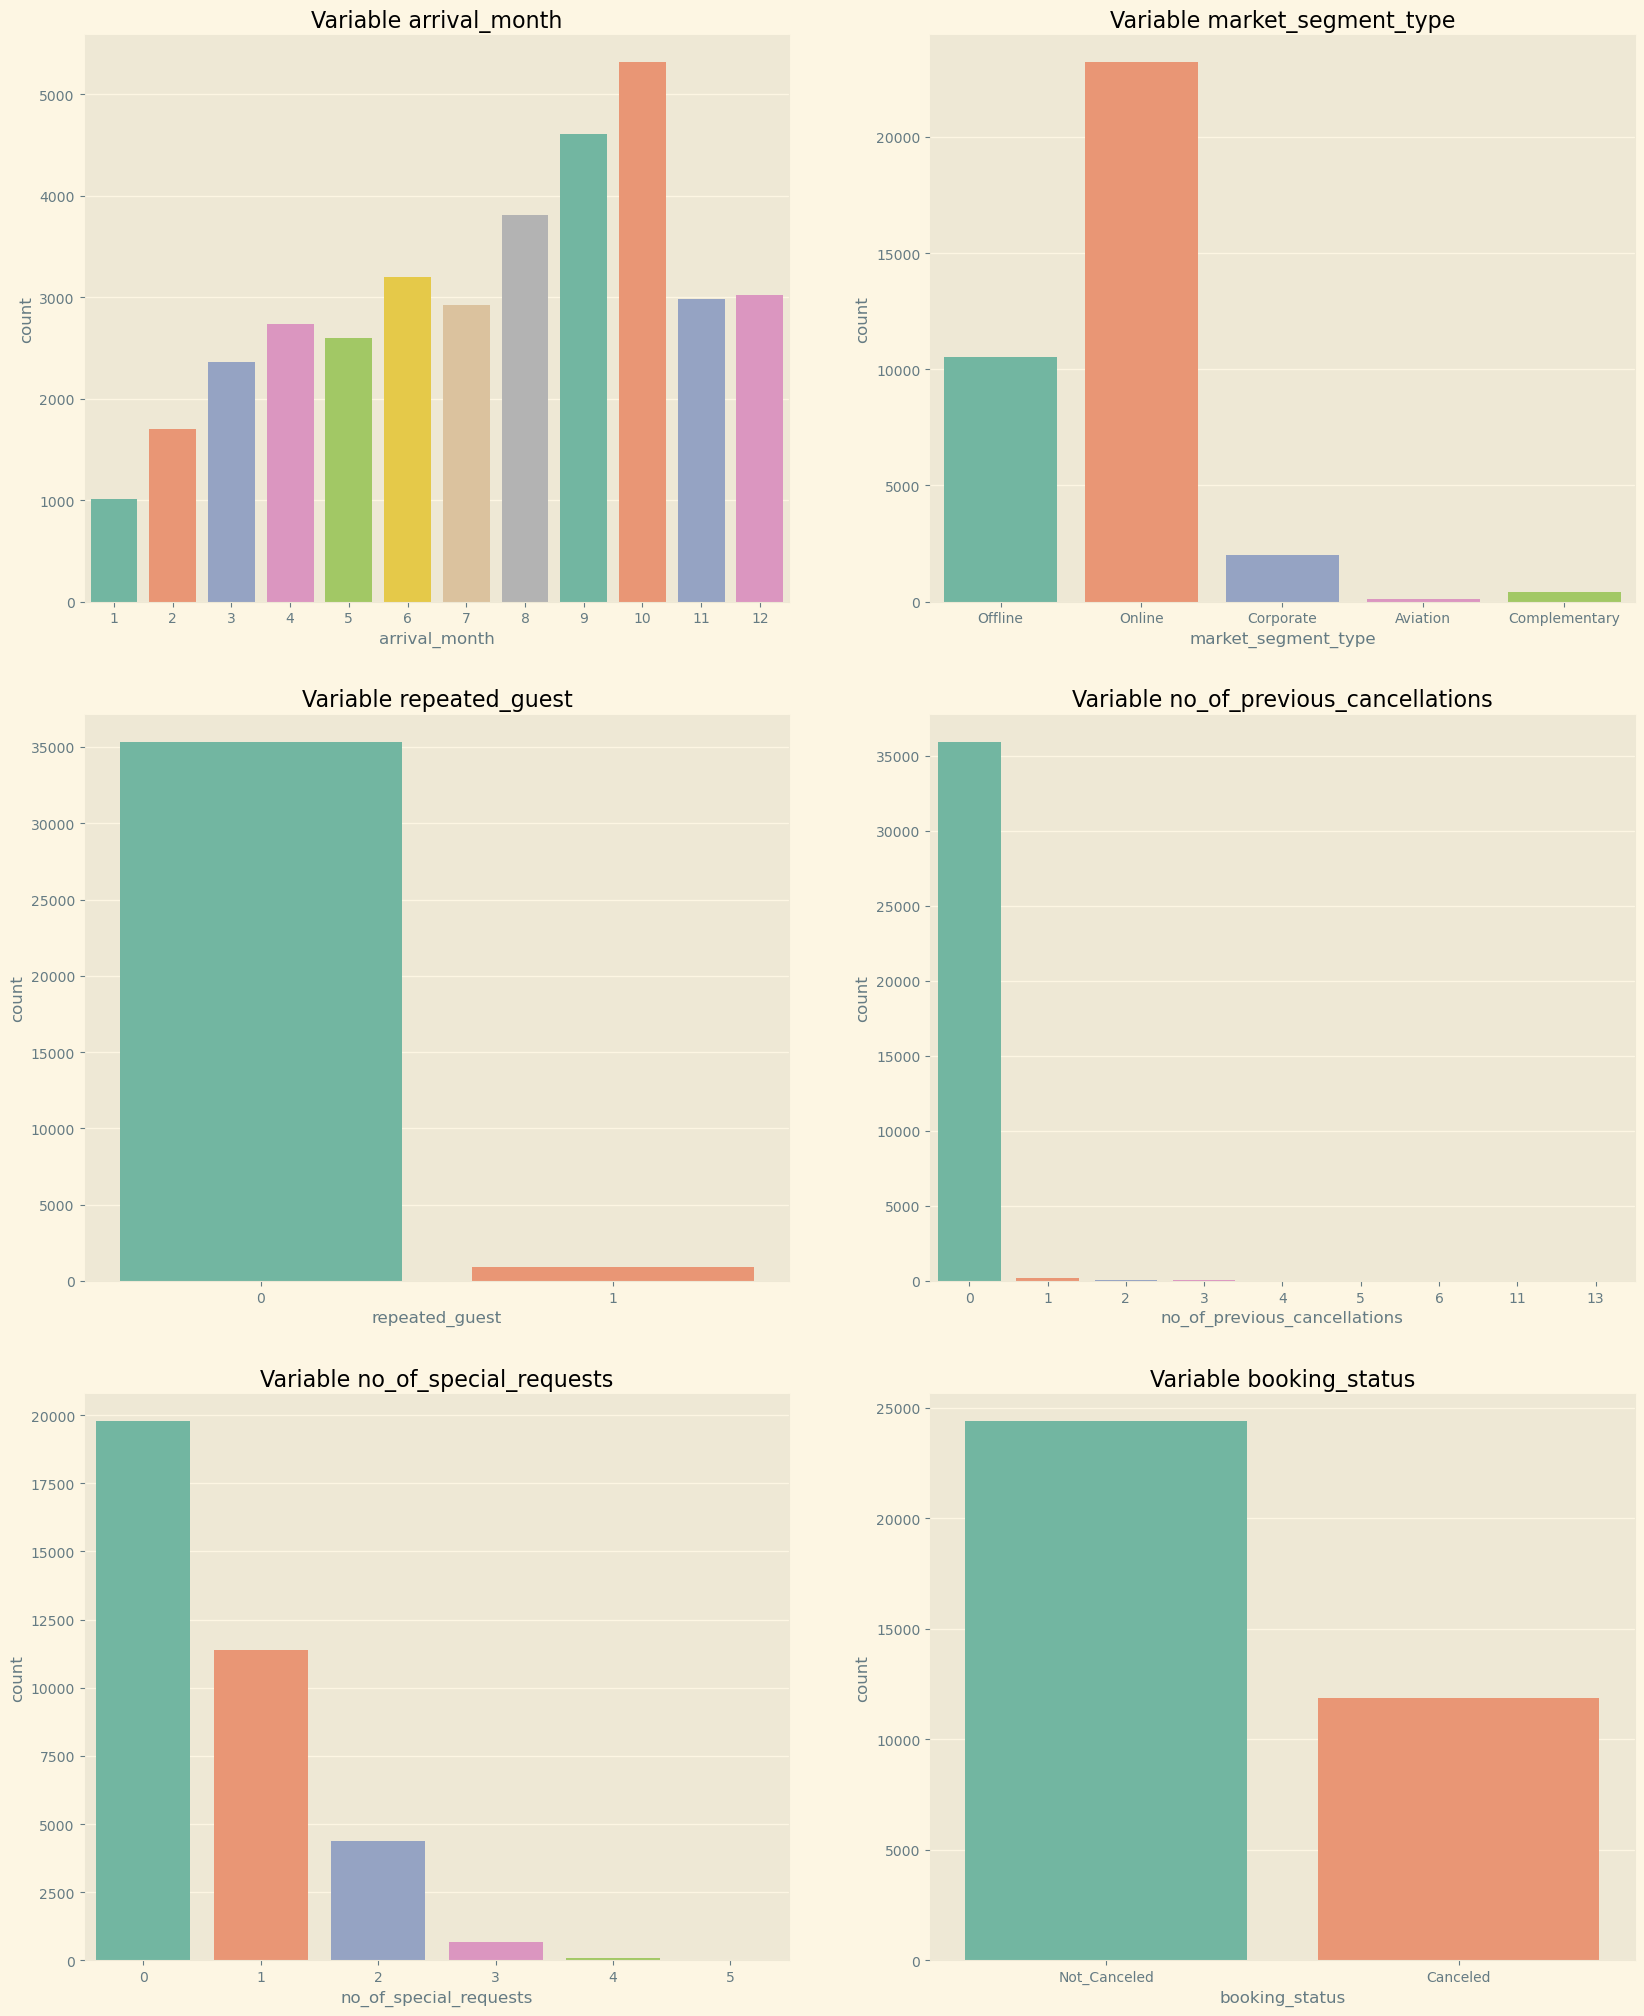

In [63]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x='arrival_month', palette='Set2', data=df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x='market_segment_type', palette='Set2', data= df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

### 연속형 변수

* 연속형 변수값들을 보면 일반적으로 예약하는 시간이 길면 예약은 줄어드는 것을 알 수 있다. 
* 우리의 데이터의 상위는 보통 100 유로의 평균 가격을 보여준다.
* 손님들은 보통 예약을 취소하지 않는다.

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

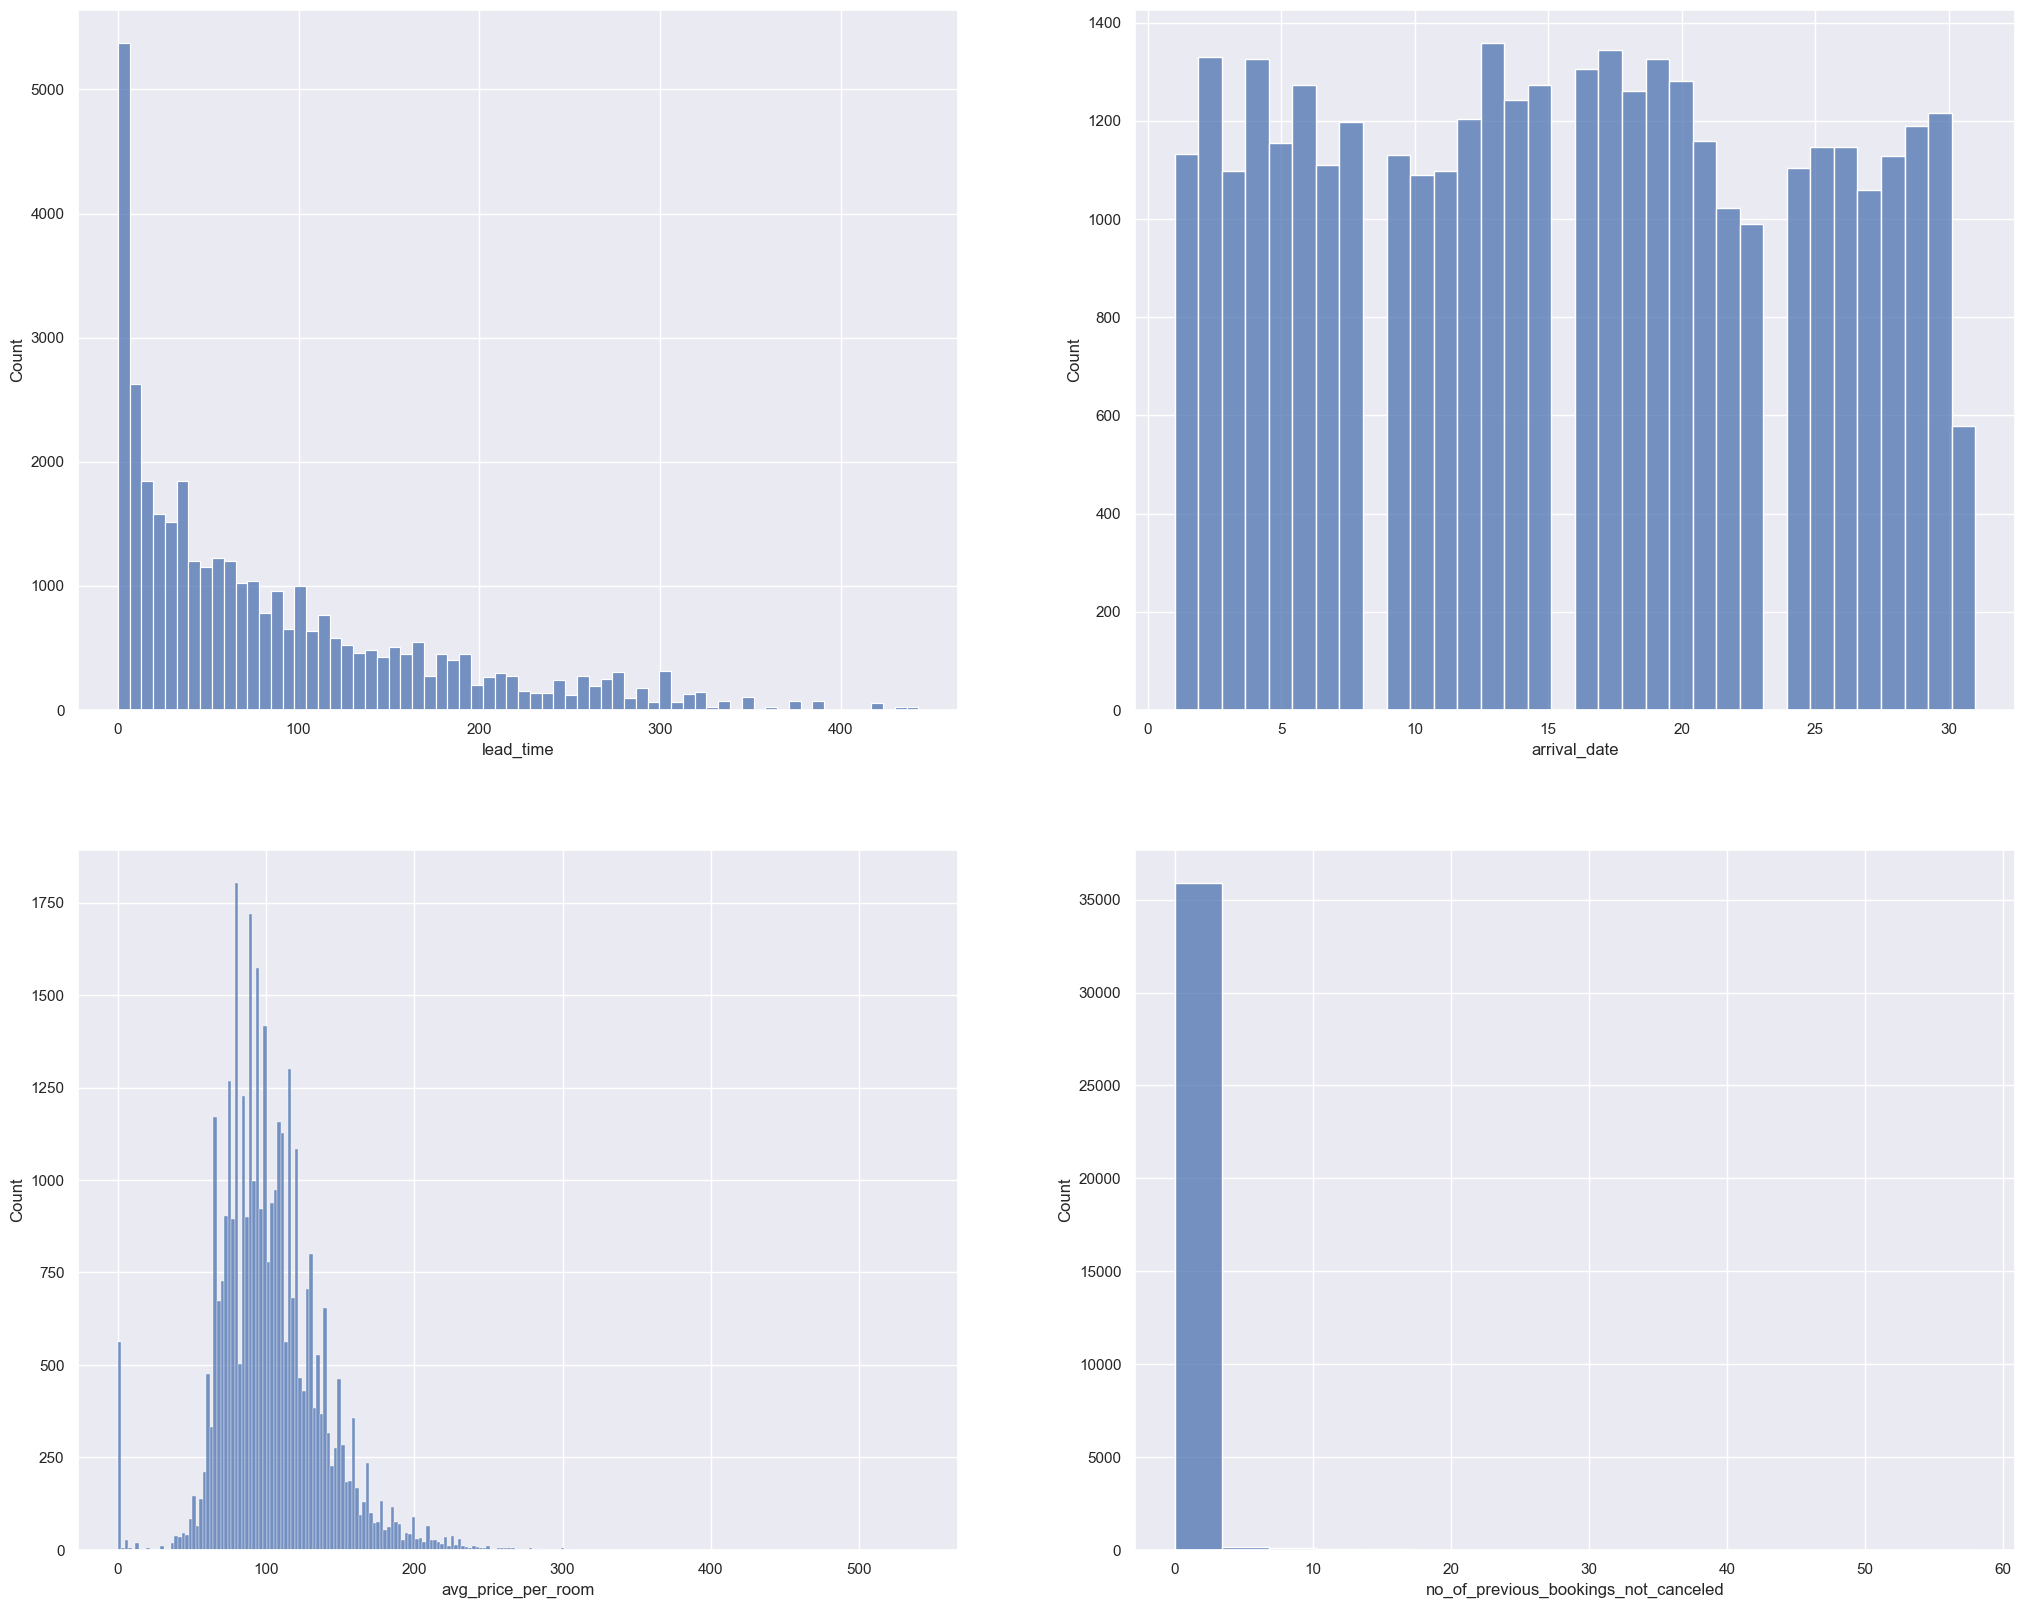

In [67]:
plt.figure(figsize=(25,20))

sns.set(color_codes=True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde=False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde=False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde=False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde=False)

### Boxplot 을 사용하여 이상치를 확인할 수 있다.

<AxesSubplot:title={'center':'Boxplot lead_time'}, xlabel='lead_time'>

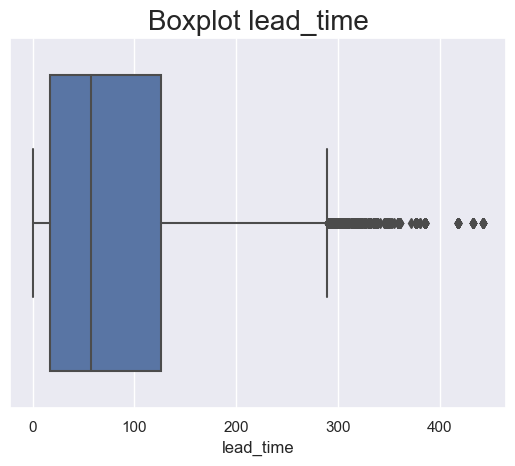

In [68]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

# 이변량 분석 

* 우리의 타겟 변수를 보면, 인사이트를 얻을 수 있다.

* 일반적으로 주자창을 요구하는 손님, 이전에 묵었던 적이 있는 손님, 특별 요청을 하는 손님은 취소 가능성이 적다.
* 여기에서 볼 수 있는 가장 큰 왜곡은 Lead_Time 변수입니다. 사람이 방을 예약하는 데 시간이 오래 걸릴수록 예약을 취소할 가능성이 높아집니다. 약간의 경사에도 불구하고 일반적으로 취소가 적습니다. 더 비싼 객실도 더 많은 취소가 발생할 수 있음을 알 수 있습니다.¶

<AxesSubplot:xlabel='booking_status', ylabel='count'>

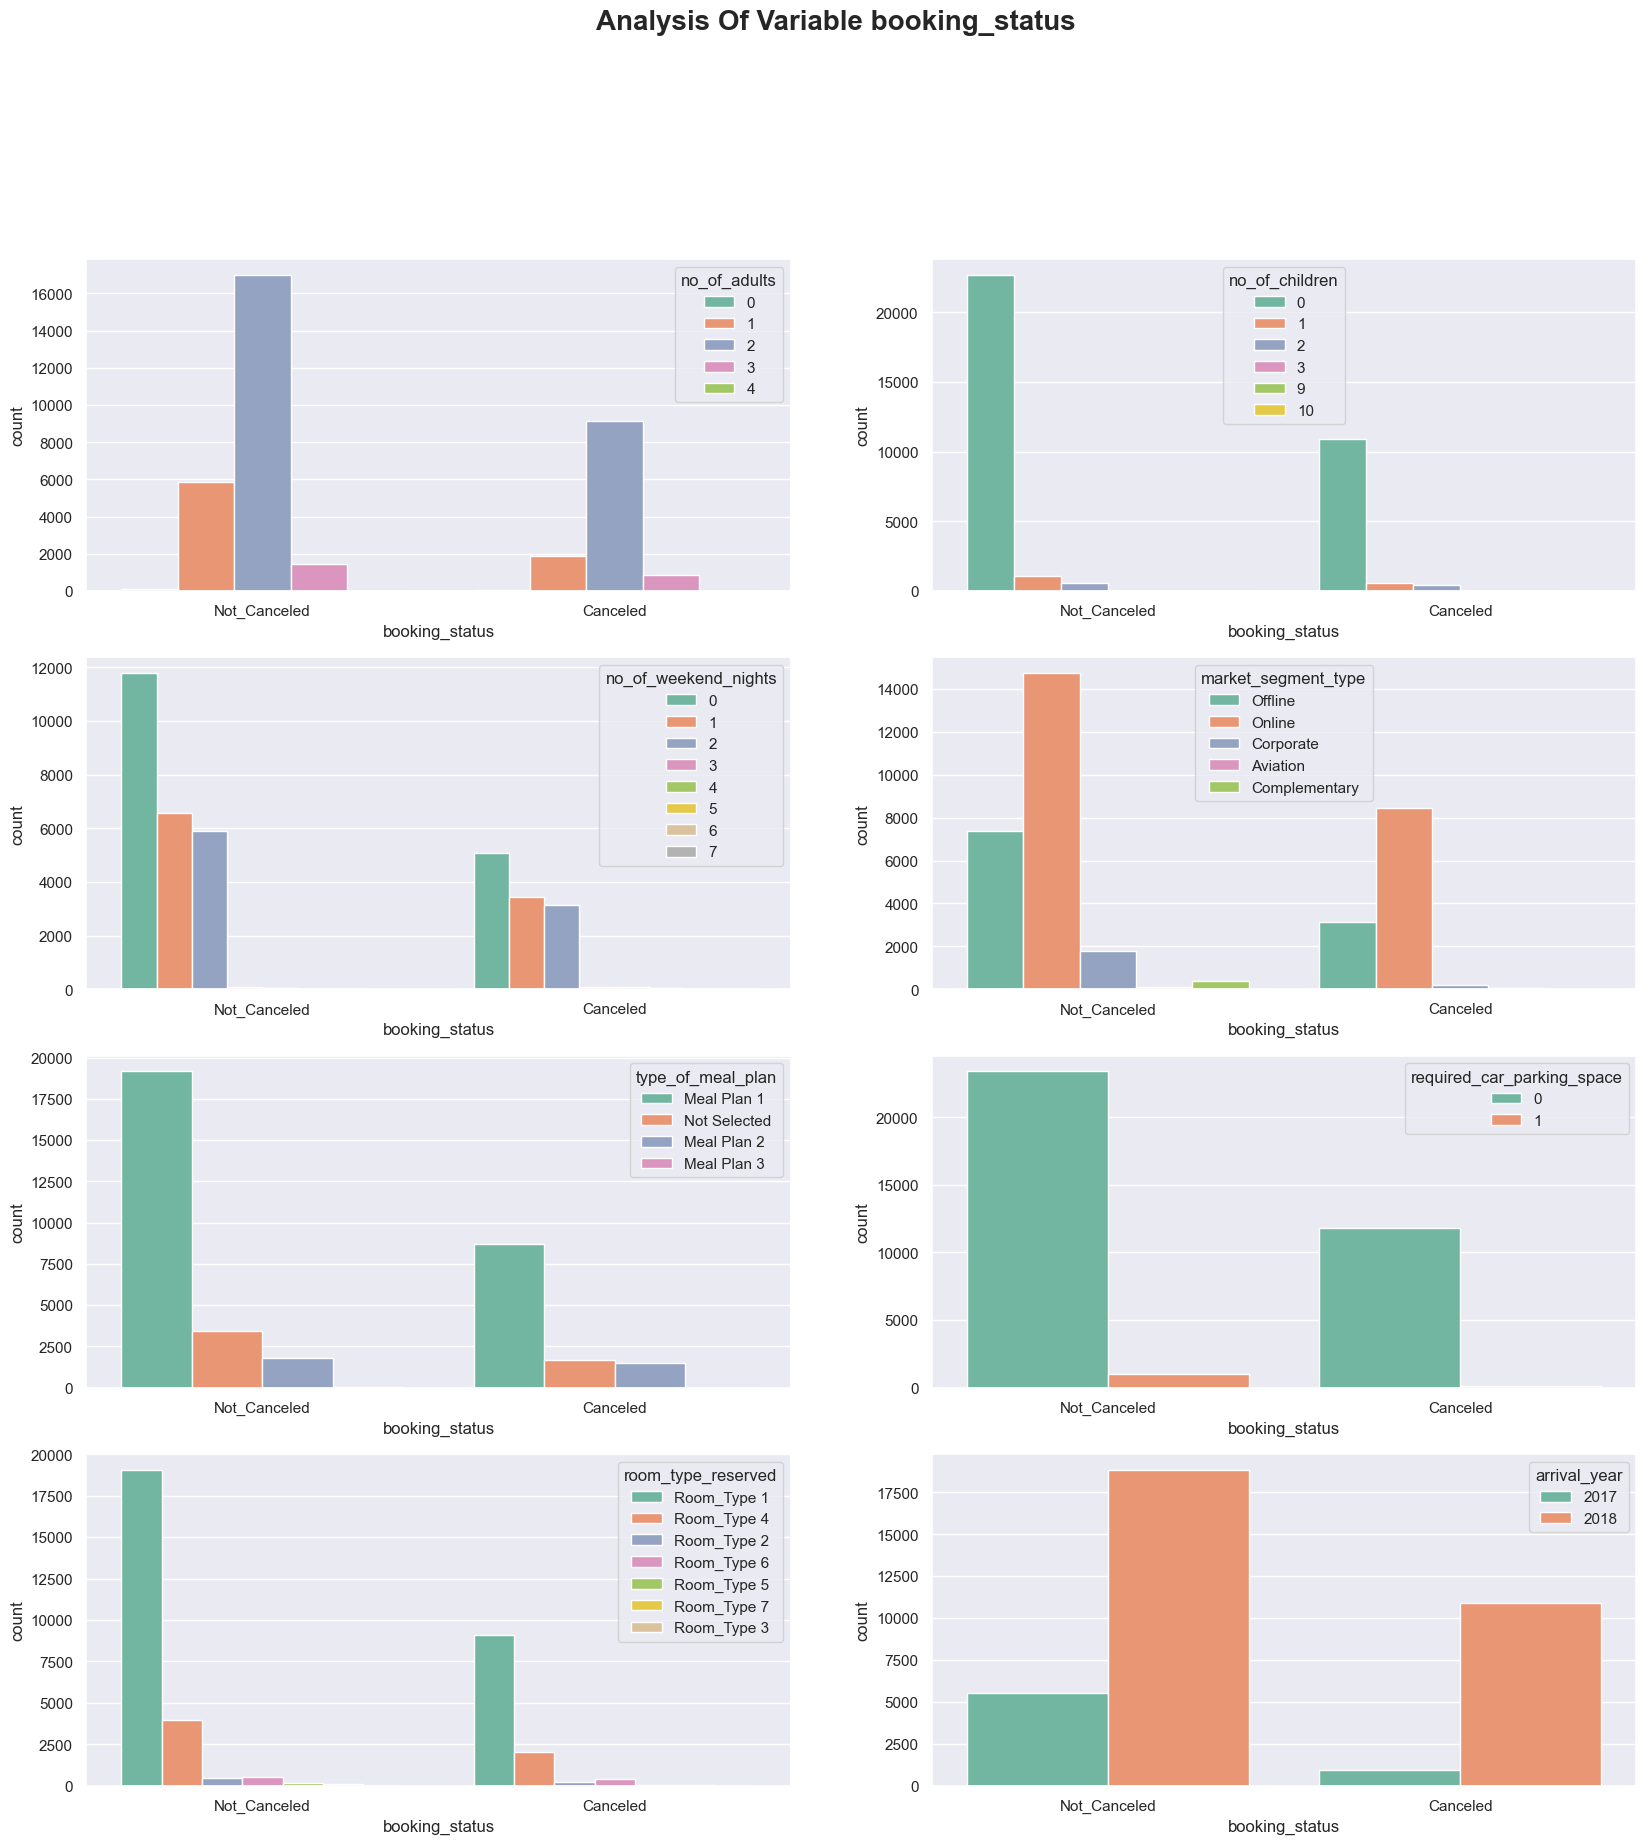

In [74]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x='booking_status', hue='no_of_adults', data=df, palette='Set2')

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

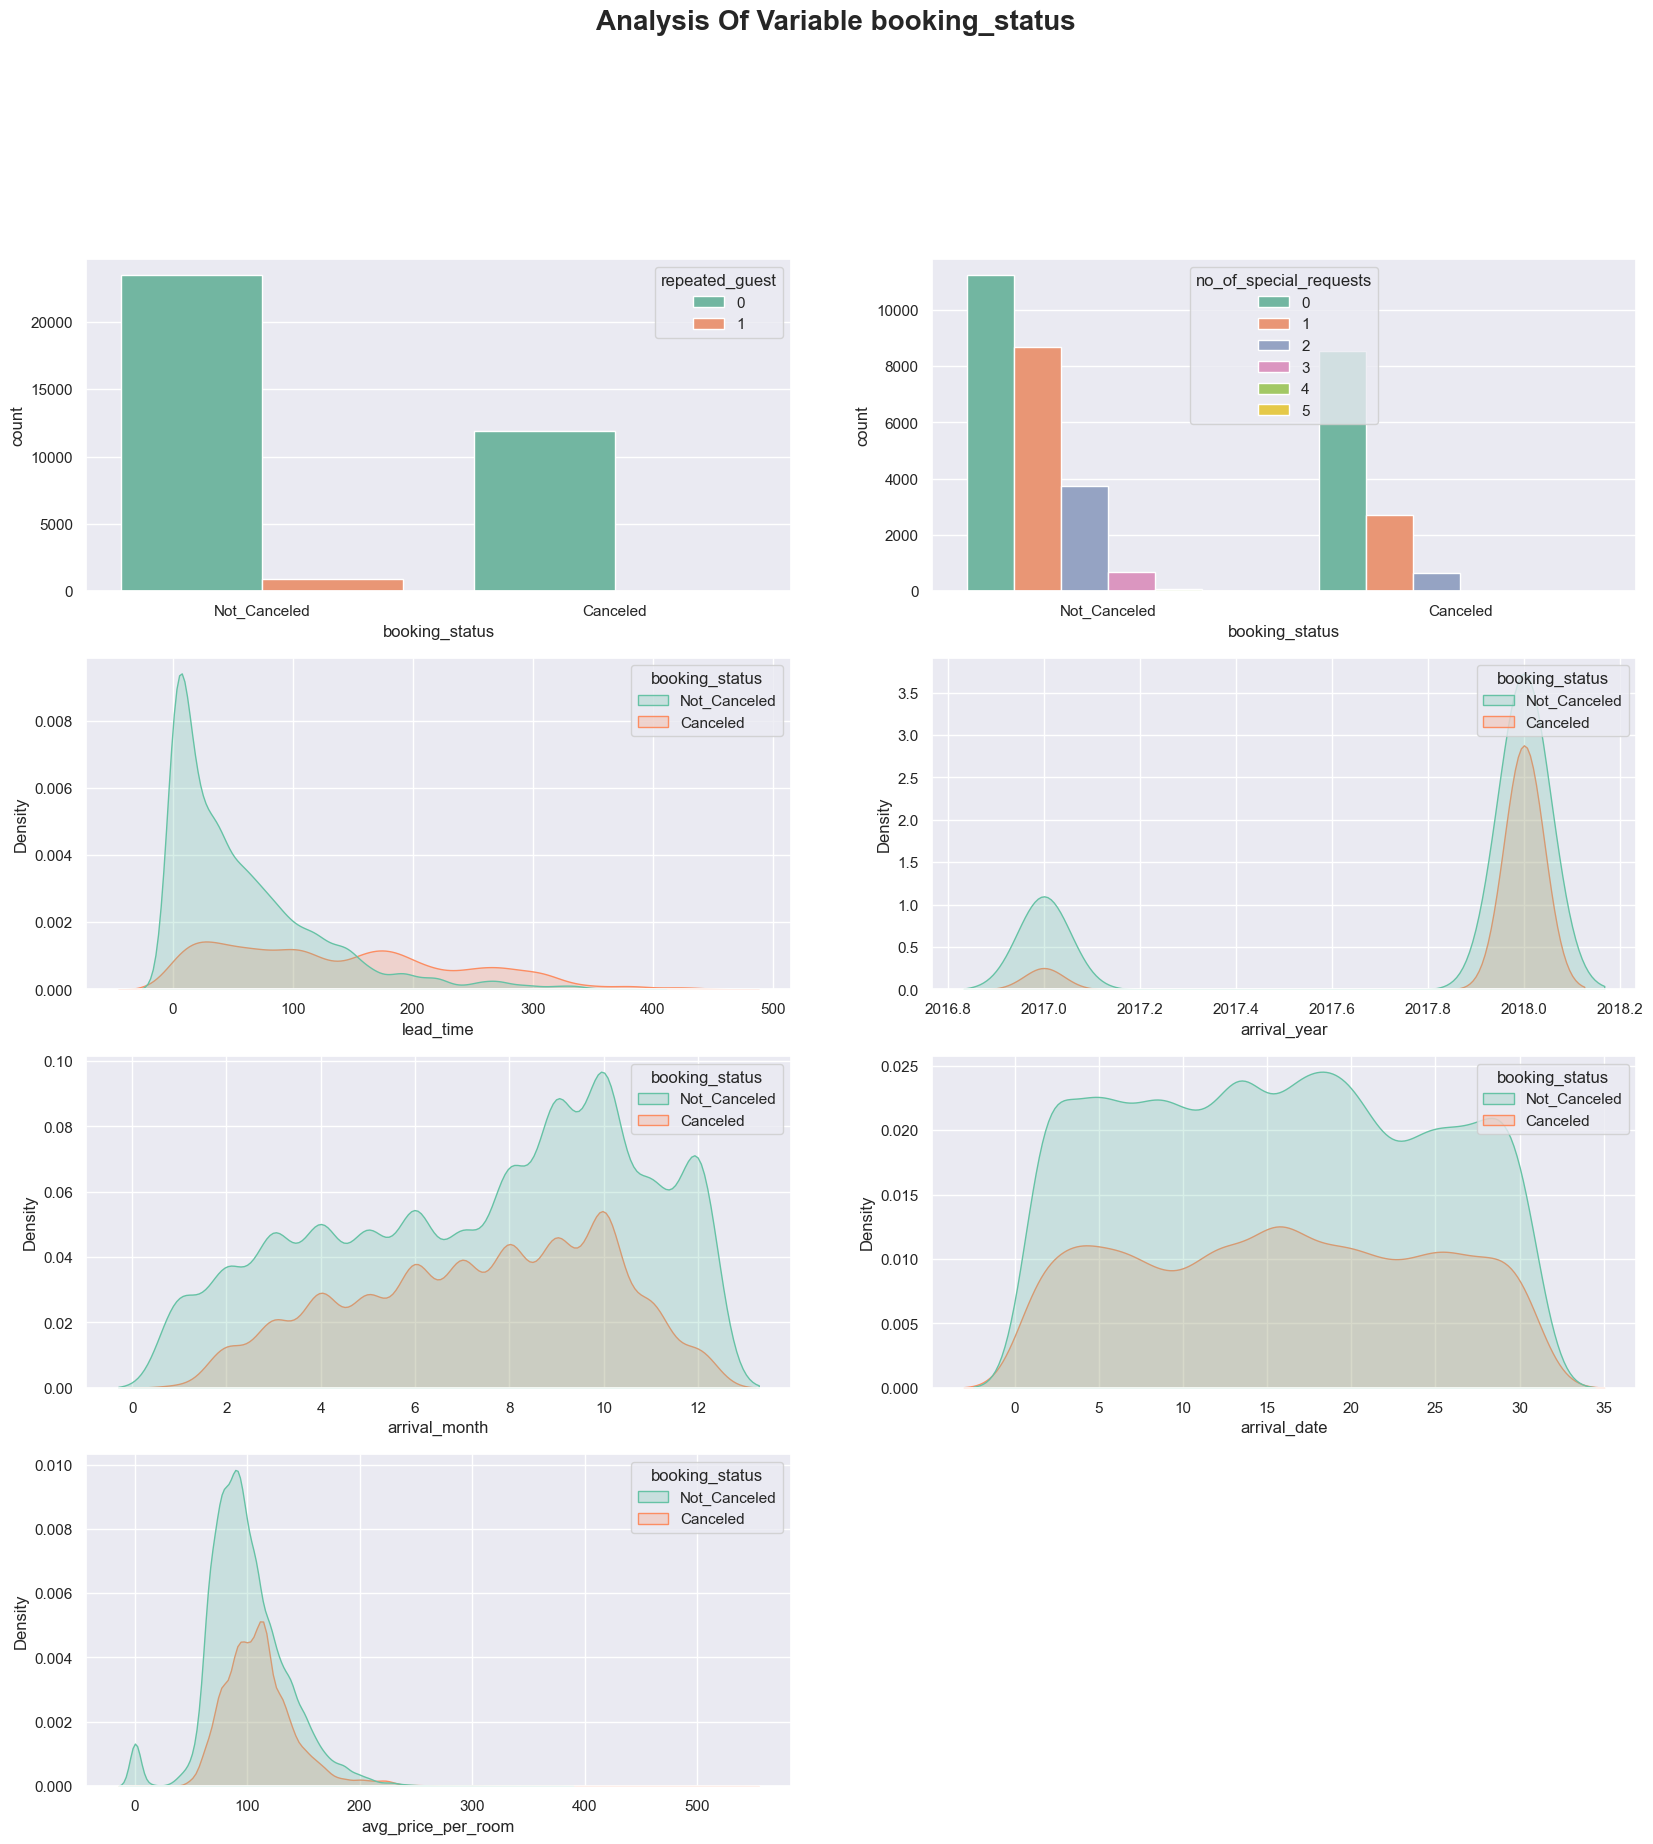

In [78]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)


plt.subplot(5,2,1)
sns.countplot(x='booking_status', hue='repeated_guest', palette='Set2', data=df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

## Review

1. 그래프를 사용할 때, 어떤 데이터 어떤 그래프를 사용할지 정하는 것도 중요하지만 변수의 수가 너무 많다면 x,y 축 중 어디를 기준으로 선택할지도 매우 중요

이제 앞서 살펴본 것처럼 Lead_Time 변수가 취소와 미취소를 가장 많이 구분하는 변수였으므로 자세히 살펴보겠습니다. 시간, 우리는 이미 호텔에 머물렀던 손님에게도 같은 것을 봅니다. 다른 변수를 보면 우리의 주의를 환기시키는 몇 가지 변수가 있습니다. 세그먼트를 보면 "특별한" 이유로 손님은 일반적으로 리드 타임이 높지 않습니다. 다른 방보다 빨리 선택되는 방도 있고 특별 요청을 보면 시간이 걸리더라도 요청이 많을수록 리드 타임이 줄어 듭니다.

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

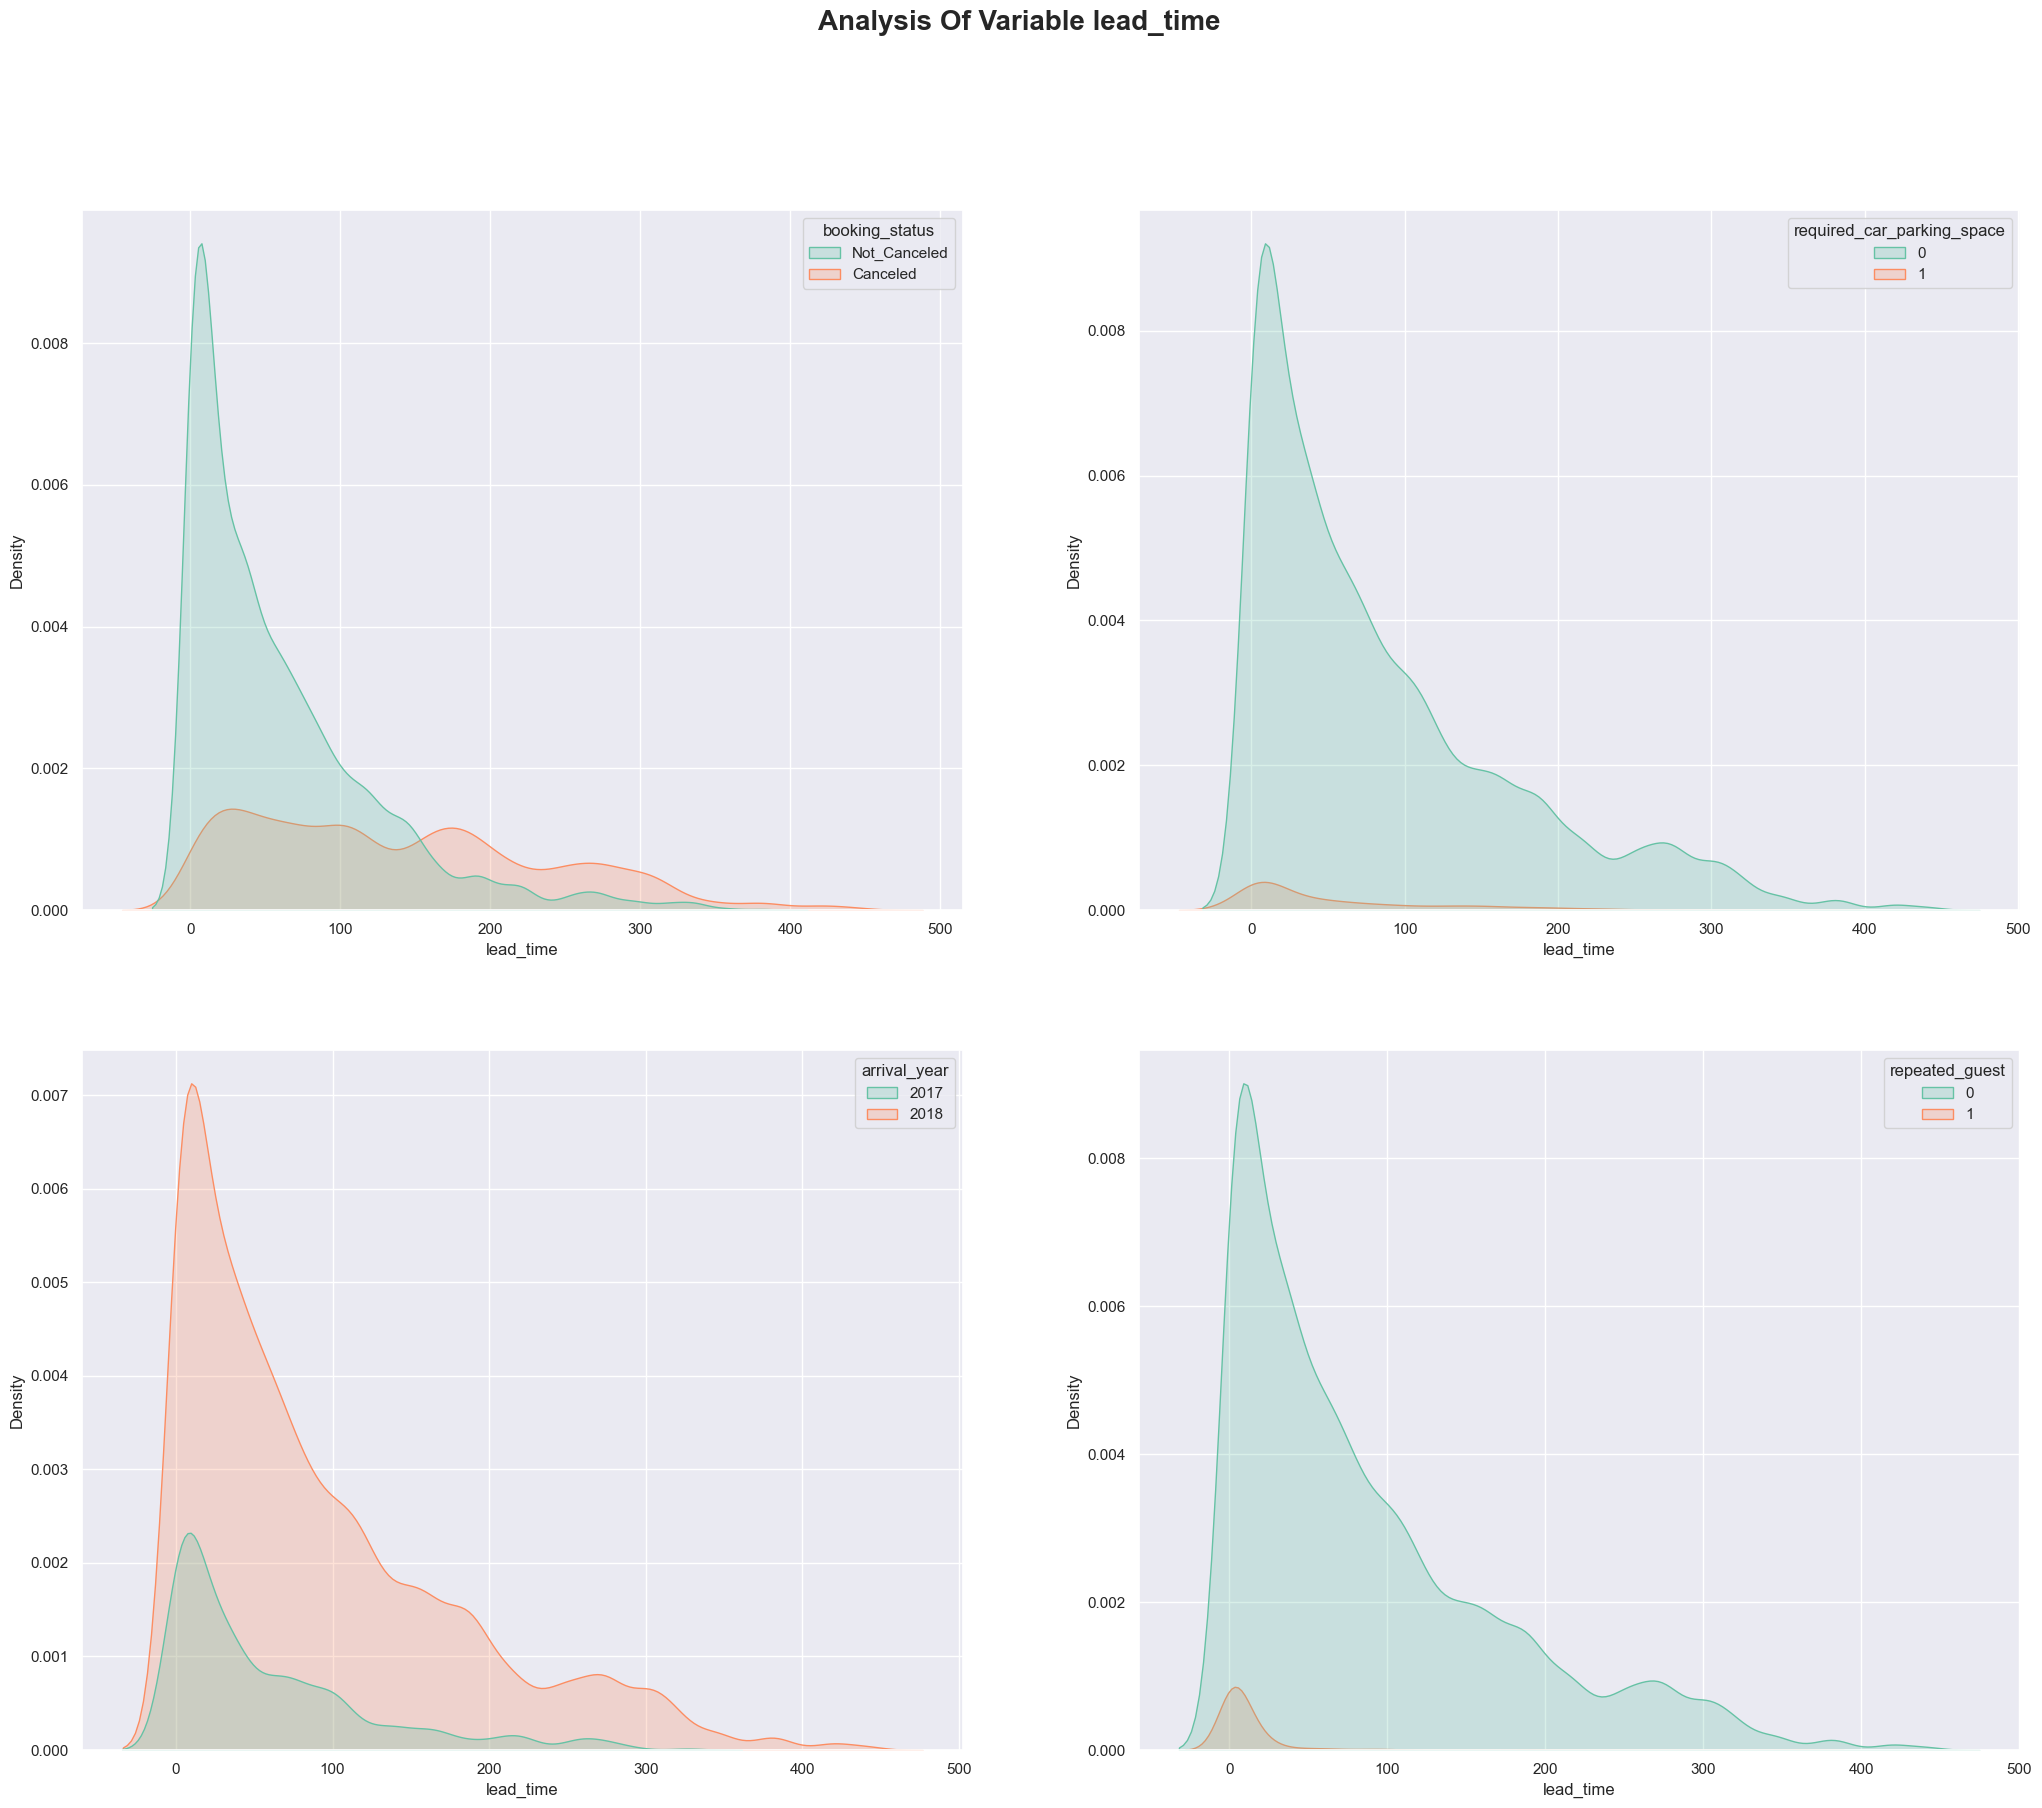

In [79]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

##### 가격이 더 높고, 리드 타임이 높을수록 취소가 될 확률이 높음

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

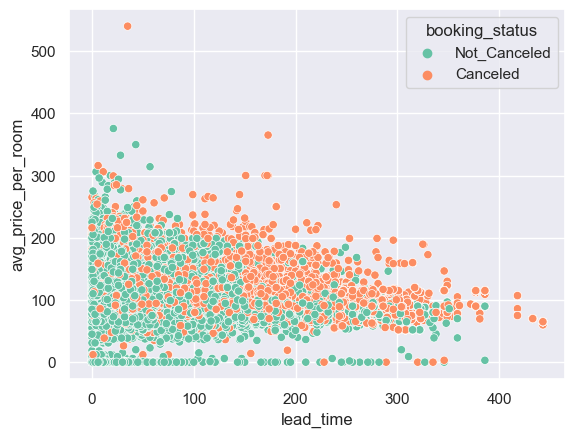

In [82]:
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', palette='Set2', hue='booking_status')

## Modeling

In [86]:
df = df.drop('Booking_ID', axis=1)

KeyError: "['Booking_ID'] not found in axis"

In [87]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season_group
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,Autumn
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,Autumn
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,Winter
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,Spring
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,Summer
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,Autumn
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,Summer
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,Spring


In [90]:
# label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [93]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


##### Separating into features variables and target variable

In [94]:
X = df.drop('booking_status', axis=1)
X = X.values
y = df['booking_status']

##### Balancing Classes